<ipython-input-1-b1490e141fb2>:44: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  STEAD_max = data_STEAD_max.variables['tx'][:]
<ipython-input-1-b1490e141fb2>:45: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  STEAD_min = data_STEAD_min.variables['tn'][:]
<ipython-input-1-b1490e141fb2>:46: DeprecationWarning: `np.bool` is a deprecated alias for the b

100yr return value = 37.09985046917846
c=-0.286
m=30.466
s=2.083
u=30.466
100yr-return value=36.857


No handles with labels found to put in legend.


[2.81044, 2.820365293187579, 2.8203642]
[1.9561911, 1.9691117120084578, 1.9691118]


<ipython-input-1-b1490e141fb2>:1491: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon_atl  = data_atl.variables['longitude'][:]
<ipython-input-1-b1490e141fb2>:1492: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat_atl  = data_atl.variables['latitude'][:]
<ipython-input-1-b1490e141fb2>:1493: DeprecationWarning: `np.bool` is a deprecated alias for 

[-0.34608183865545783, -0.043794687797152676, -0.11889879384894186, -0.326019829635964, -0.19621231217887924, -0.2670771652484163, -0.1566542855568258, -0.07964535698539876, 0.2228100001574589, -0.28888260967669765, -0.25985793336014495, -0.08363002748292558, -0.3830326678669813, -0.4866750158448667, -0.35358292972325245, -0.24932912917044447, 0.1620079744082581, 0.16285582500470852, -0.21644252748292558, -0.09099018896095856, -0.4439097045268596, -0.048370353348506256, -0.3470433421468755, 0.05945896727995148, -0.4241500122079742, -0.3031392288213013, -0.12267888913552838, -0.11750313629875109, 0.10520880361978158, -0.04083743947012408, -0.23147198631329857, -0.14893725398859914, -0.6723702078727989, -0.6327417164558646, -0.3510098281812084, -0.2764898980095474, -0.10030745329031632, -0.45555230708723116, -0.06835962451522093, -0.388519829635964, -0.3906087698454499, -0.2001447023447227, -0.4937033108695985, -0.5155746739769604, -0.567495862513475, 0.04347709718975423, -0.177789177904

<ipython-input-1-b1490e141fb2>:1630: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(1,1,figsize=(10,6))


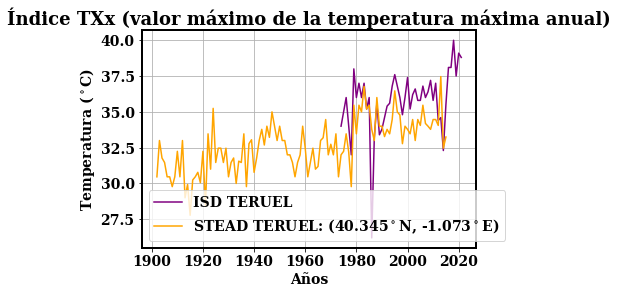

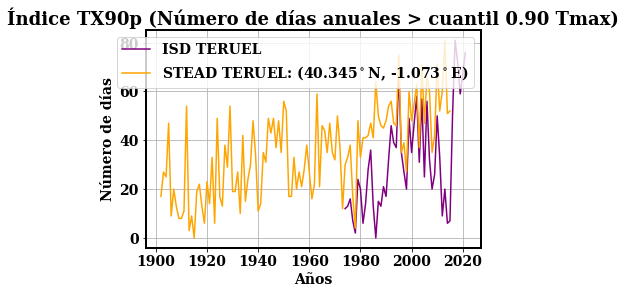

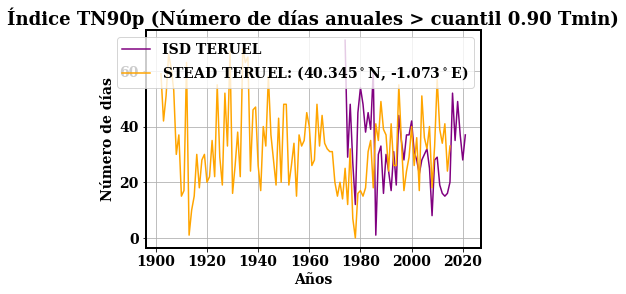

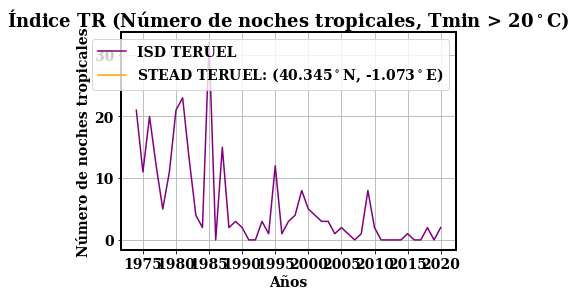

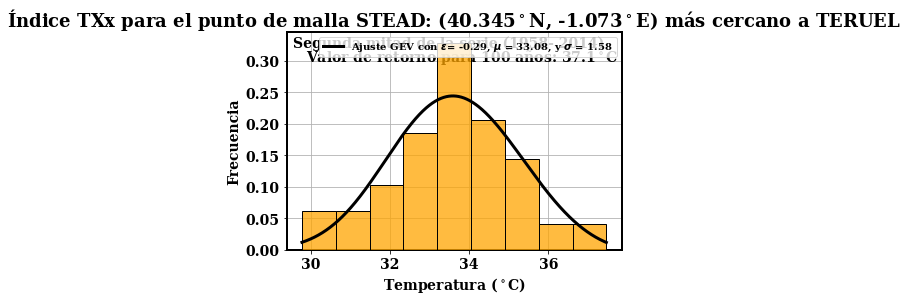

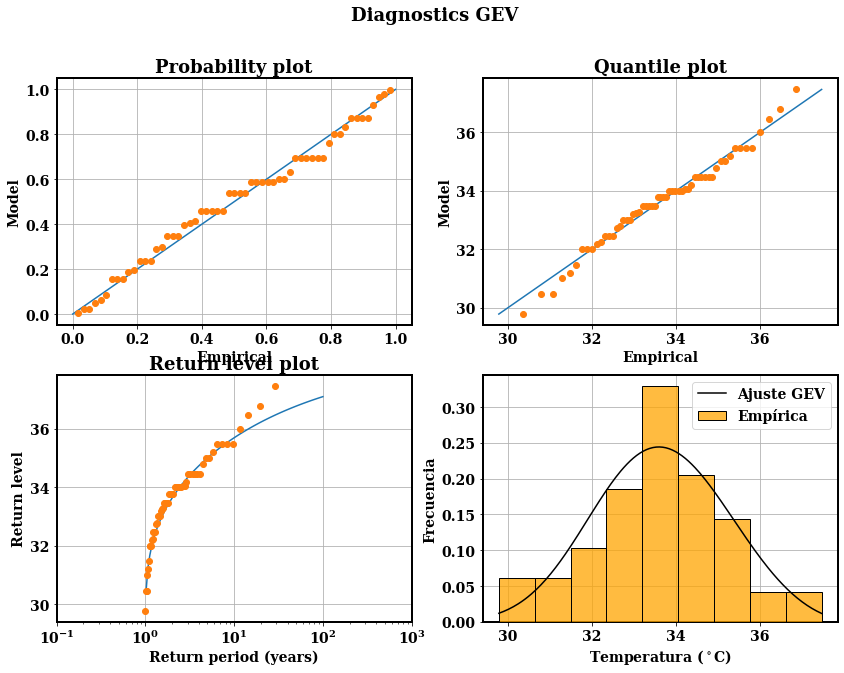

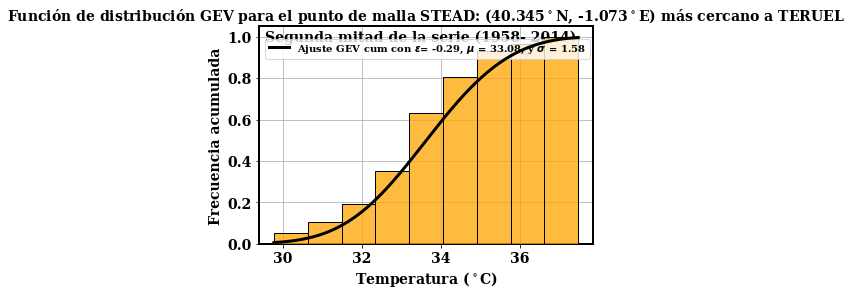

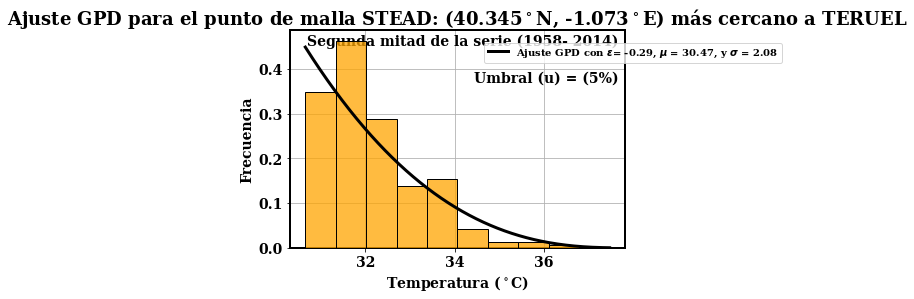

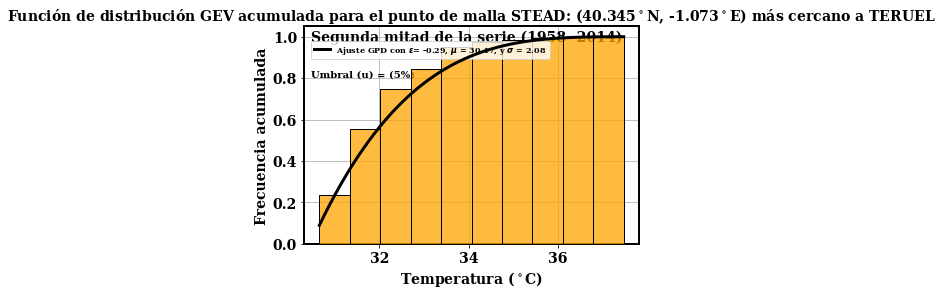

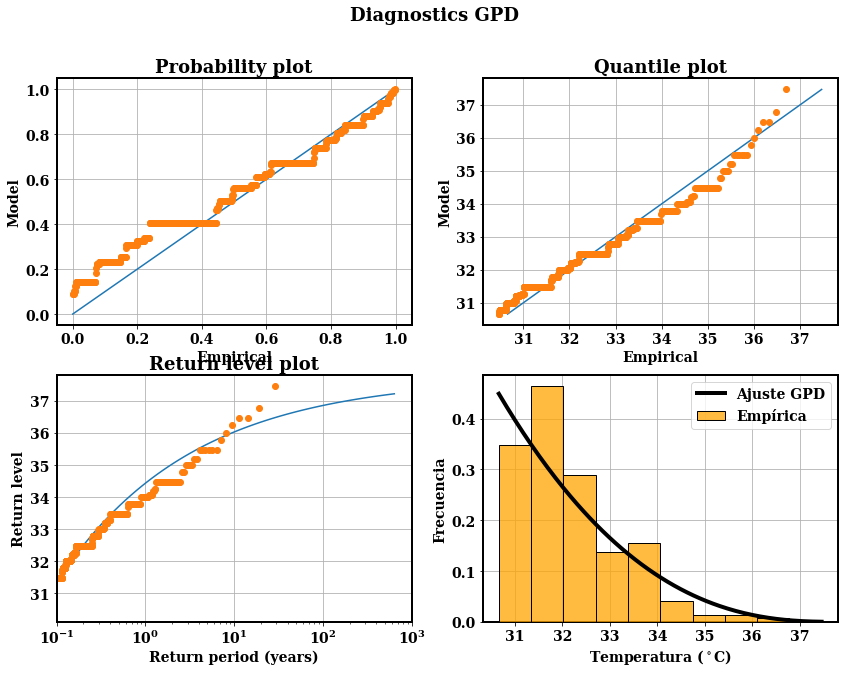

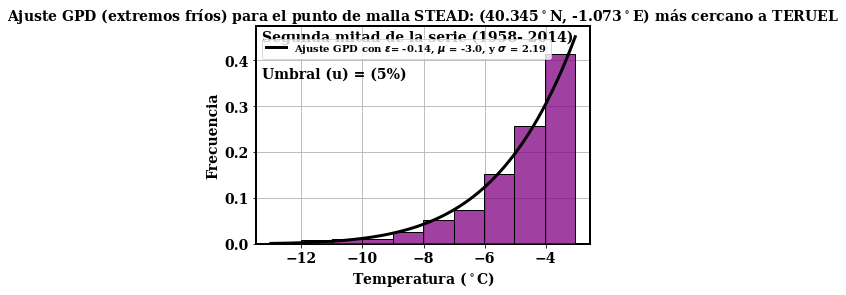

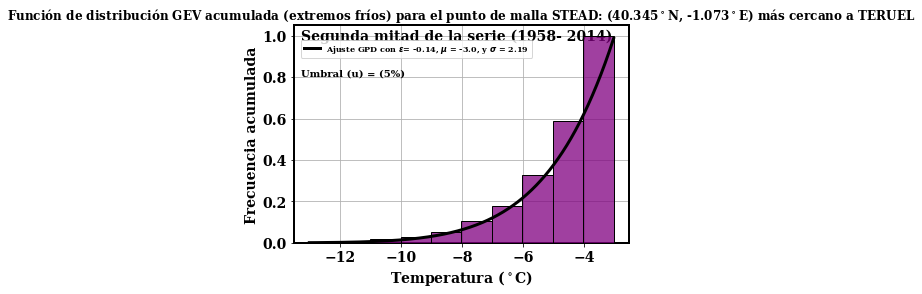

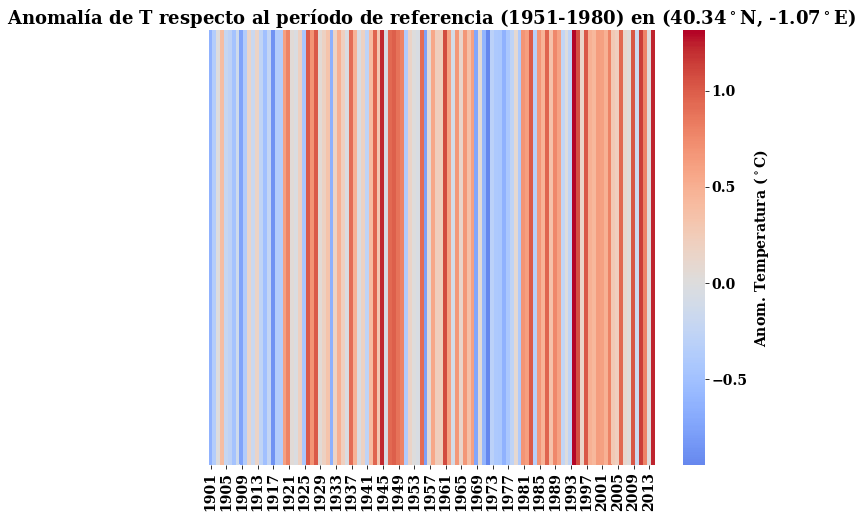

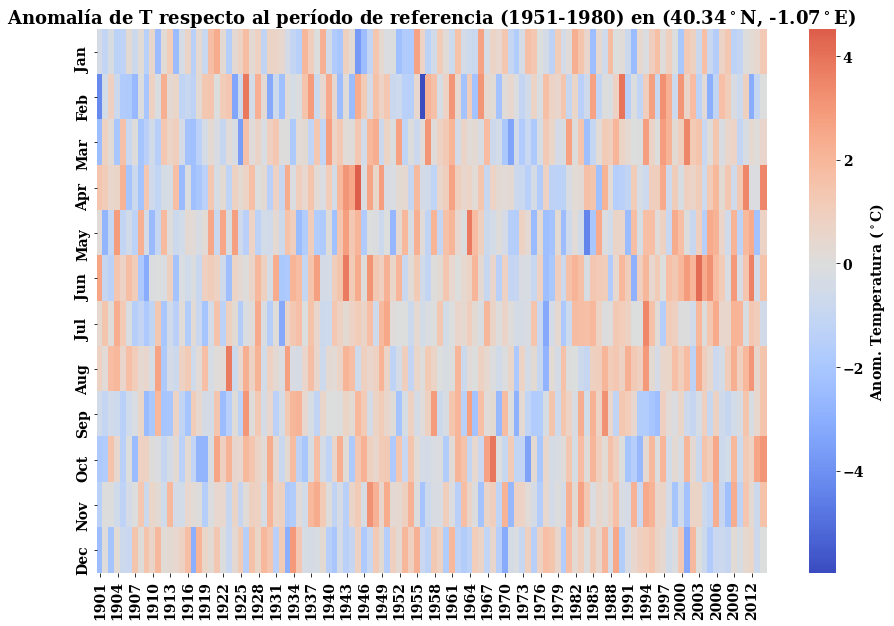

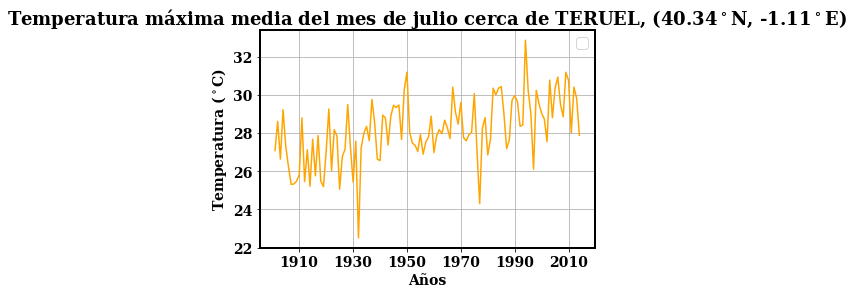

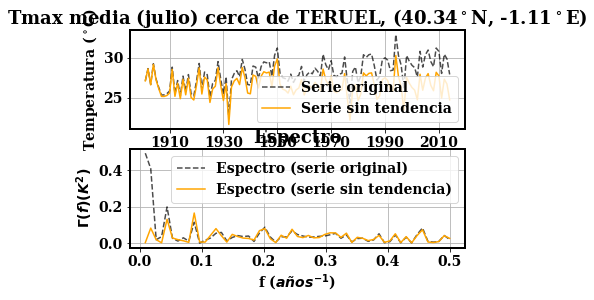

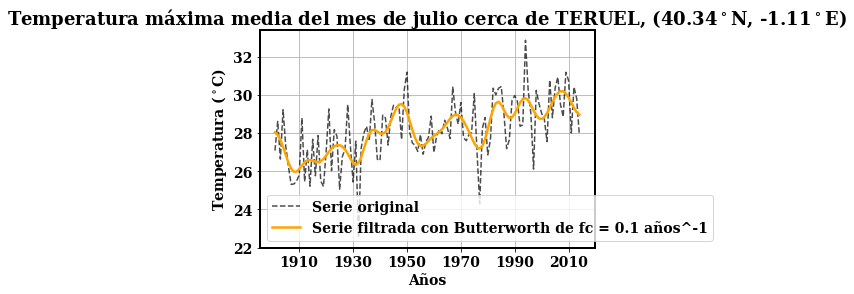

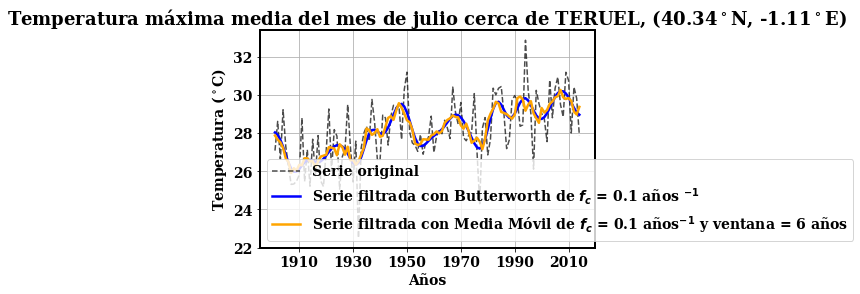

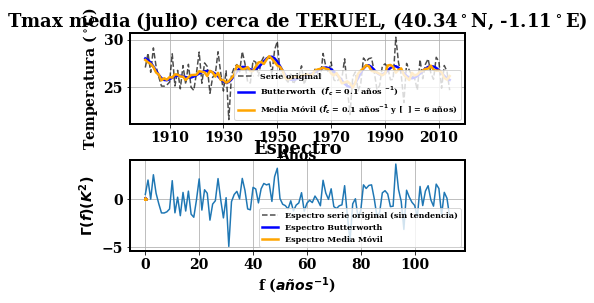

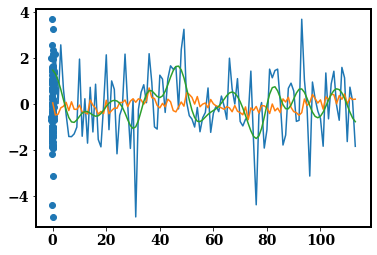

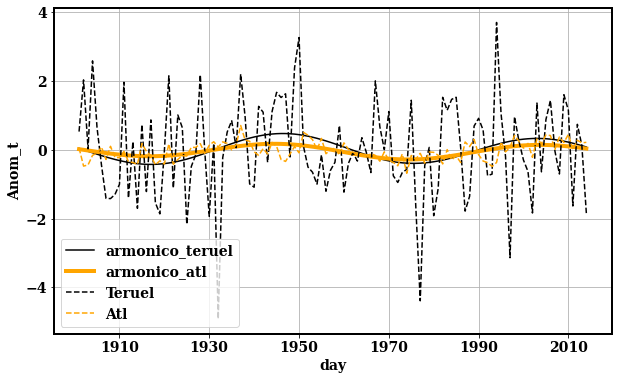

In [1]:
# Práctica 2 Análisis de Datos en Meteorología: Análisis de extremos
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import netCDF4 as nc
import seaborn as sns
import xarray as xr
#import probscale

from statsmodels.tsa import stattools
from netCDF4 import Dataset
from scipy import stats
from scipy import signal
from scipy.fft import fft
# =============================================================================
# Actualización parámetros plots
# =============================================================================

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',edgecolor='k',linewidth=3)
parameters = {'xtick.labelsize':14,
              'ytick.labelsize':14,
              'axes.labelsize':14,
              'axes.labelweight':'bold',
              'axes.titleweight':'bold',
              'axes.titlesize':18,
              'axes.linewidth':2}
plt.rcParams.update(parameters)

# =============================================================================
# Definición de funciones previas y descarga de datos STEAD
# =============================================================================
# Descarga de datos STEAD
path= r'C:/Users/Portatil/Desktop/Analisis_de_datos_en_meteorologia/practica_2_entregar/'
file_max = r'tmax_pen.nc'
file_min = r'tmin_pen.nc'
data_STEAD_max= nc.Dataset(path+file_max)
data_STEAD_min= nc.Dataset(path+file_min)
STEAD_max = data_STEAD_max.variables['tx'][:]
STEAD_min = data_STEAD_min.variables['tn'][:]
lon  = data_STEAD_max.variables['lon'][:]
lat  = data_STEAD_max.variables['lat'][:]
# Las hemos sacado fuera de la función porque tarda mucho en cargar

# puede dar problema por los años de inicio y fin--> revisar
def readISD(stationName,yearInit,yearEnd):
   
    ''' Parámetros de entrada:
            stationName --> Nombre de la estación
       
        Parámetros de salida:
            data --> Datos ISD en formato df
           
   
   
    '''
    path = r"C:/Users/Portatil\Desktop/Analisis_de_datos_en_meteorologia/practica_2_entregar/"
    data='datos1nuevos.csv'
    c=pd.read_csv(path + data)

   

    # Extraemos el USAF  (Air Force station ID)
    stationName = stationName
    #USAF = c.loc[c['CTRY']=='SP'].loc[c['STATION NAME']==stationName]['USAF'].values[0] # 082320

    #a=c.loc[c['USAF']==USAF]


    #Construimos el código que necesitamos para bajar los datos de la estación:
    station=str(c.loc[(c['STATION NAME']==stationName)]['USAF'].values[0]) + '-' + \
    str(c.loc[(c['STATION NAME']==stationName)]['WBAN'].values[0])
    # Básicamente hemos construido el código juntando el USAF y el WBAN con guión de por medio (WBAN == NCDC WBAN number)
    #Definimos las columnas y el tipo de dato que va a tener el DataFrame donde vamos a alojar los datos de la estación
    colNames=['year','month','day','hour','temp','tempd','slp','windDir','windSpeed','cloud','pcp1h','pcp6h']
    dataType=['int','int','int','int','float','float','int','int','int','int','int','int',]

    #Definimos los límites de los caractéres donde están los datos en los archivos que vamos a leer
    #(Esta información está en: https://www.ncei.noaa.gov/pub/data/noaa/isd-lite/isd-lite-format.txt)
    limits=[(0,4),(5,7),(8,10),(11,13),(14,19),(20,25),(26,31),(32,37),(38,43),(44,49),(50,55),(56,61)]
   
    #lectura de los datos:
    df=pd.DataFrame(columns=colNames) #Creamos el df vacío

    for iyr in range(yearInit, yearEnd+1, 1): #year end + 1 para que nos incluya el último año
   
        fil='https://www.ncei.noaa.gov/pub/data/noaa/isd-lite/'+str(iyr)+'/'+ station + '-' + str(iyr)+'.gz' #ruta para descargar el archivo de cada año

   
        data= pd.read_fwf(fil,sep=' ',compression='gzip',head=0,
                     names=colNames,colspecs=limits) #fwf? tablas lineas formateadas?
                                                     #leemos el archivo con separador, formato gzip, y los límites
        df = df.append(data) #añadimos cada fila al dataframe

    #Creamos el diccionario para asignar tipos numéricos (los carga como str por defecto)
    dictType={colNames[i] : dataType[i] for i in range(12)}
    data = df.astype(dictType,copy=True)
    data = data.replace(-9999,np.NaN) #Tenemos la bbdd en data
   
    return data


def DailyMinISD(data):
# ya solucionado el problema de las unidades en la temperatura
   
    '''
    Parámetros de entrada:
        data --> dataframe con los datos ISD (cuidado que no siempre son horarios dependiendo de la estación)
   
    Parámetros de salida:    
        dataDailyMax --> Máximo diario (lo usamos para las temperaturas)
       
    '''
    dataDailyMin = data.groupby(['year','month','day']).min().drop(['hour'],axis=1).reset_index()
    dataDailyMin['time'] = pd.to_datetime(dataDailyMin[['year','month','day']],yearfirst=True)
    dataDailyMin = dataDailyMin.set_index('time')
    dataDailyMin['temp'] = dataDailyMin['temp']/10

    return dataDailyMin

def DailyMaxISD(data):
# ya solucionado el problema de las unidades en la temperatura
   
    '''
    Parámetros de entrada:
        data --> dataframe con los datos ISD (cuidado que no siempre son horarios dependiendo de la estación)
   
    Parámetros de salida:    
        dataDailyMax --> Máximo diario (lo usamos para las temperaturas)
       
    '''
    dataDailyMax = data.groupby(['year','month','day']).max().drop(['hour'],axis=1).reset_index()
    dataDailyMax['time'] = pd.to_datetime(dataDailyMax[['year','month','day']],yearfirst=True)
    dataDailyMax = dataDailyMax.set_index('time')
    dataDailyMax['temp'] = dataDailyMax['temp']/10

    return dataDailyMax

def DailyCumISD(data):
    '''
    Parámetros de entrada:
        data --> dataframe con los datos ISD (cuidado que no siempre son horarios dependiendo de la estación)
       
    Parámetros de salida:    
        dataDailyCum --> Acumulado diario (lo usamos para la pcp?)(cuidado con las unidades de las temperaturas y con
                                               el número de datos por día)
    '''
    dataDailyCum = data.groupby(['year','month','day']).sum().drop(['hour'],axis=1).reset_index()
    dataDailyCum['time'] = pd.to_datetime(dataDailyCum[['year','month','day']],yearfirst=True)
    dataDailyCum = dataDailyCum.set_index('time')
   
    return dataDailyCum
# revisar por si utilizamos alguna variable mal calculada

def DailyMeanISD(data):
# revisar por si utilizamos alguna variable mal calculada

    '''
    Parámetros de entrada:
        data --> dataframe con los datos ISD (cuidado que no siempre son horarios dependiendo de la estación)
       
    Parámetros de salida:    
        dataDailyMean --> Media Diaria (cuidado con las temperaturas, prec y demás que pueden dar problemas)(Revisar la construcción de la función)
    '''
    dataDailyMean = data.groupby(['year','month','day']).mean().drop(['hour'],axis=1).reset_index()
    dataDailyMean['time'] = pd.to_datetime(dataDailyMean[['year','month','day']],yearfirst=True)
    dataDailyMean = dataDailyMean.set_index('time')
   
    return dataDailyMean


def returnLevel(p,c,m,s):
    '''

    Parameters
    ----------
    p : float
        Probability of ocurrence given
    c : float
        Parameter c of GEV using max vero.
    m : float
        Parameter m of GEV using max vero.
    s : float
        Parameter s of GEV using max vero.

    Returns
    -------
    zp : float
        Expected value for inverse of prob given (return period).

    '''
    if (abs(c) > 0.00001 ):
        zp = m - ( s / c ) * ( 1 - ( - np.log( 1 - p ) ) ** ( - c ))
    else :
        zp = m - s * np.log( - np.log( 1 - p ) )
    return zp

def GEV(x,c):
    #Función que calcula la función densidad de probabilidad de Generalized Extrem Value normalizada
    # con m = 0, s = 1
    #nota: también puedes usar g=stats.genextreme.pdf(x,-c)
    if ( abs(c) < 0.005 ) :
        g = np.exp(-np.exp(-x))*np.exp(-x)
    else:
        g = ( np.power( 1 + c * x , -1-1/c) ) * np.exp( - np.power(1 + c * x ,-1/c) )
    return g

def GEVms(x,c,m,s):

   
    #Función que calcula la función de densidad de probabilidad Generalizada Extreme Value sin normalizar
    y = ( x - m ) / s
    if ( abs(c) < 0.005 ) :
        g = ( np.exp(-np.exp(-y))*np.exp(-y) ) / s
    else:
        g = ( np.power( 1 + c * y , -1-1/c) ) * np.exp( - np.power(1 + c * y ,-1/c) ) / s
    return g

def GPDs(y,c,s):
    #Función que calcula la función de densidad de probabilidad de Pareto Generalizada
    if (abs(c)<0.0001):
        h = np.exp(-y/s)*(1/s)
    else:
        h = (1/s) * ( 1 + c * y / s) ** (-1-1/c)
    h[y<=0]=0
    return h


def MLE_GEV(c,m,s,x):
    #Función que calcula la función likelihood sobre GEV con
    #los parámetros de entrada c,m,s
    #y la muestra de datos x
    if ( (s < 0) | np.any(1 + c * (x-m)/s ) < 0):
        sal=1e7
    else:            
        if (abs(c) > 0.00001 ):
            t = (1 + c * (x-m)/s )**(-1/c)
        else :
            t = np.exp(-(x-m)/s)
        f = - np.log(s) + (c +1)*np.log(t) -t
        sal = f.sum()
    return -sal


def densityPlotGEV(ax,x,c,m,s):
    sns.histplot(x=x, stat ='density', zorder=5, color = 'orange', label = 'Empírica',ax = ax)
    #x1, x2 = 2*bins[0] - bins[1], 2* bins[-1] - bins[-2]
    #ax.set_xlim(x1,x2)
    x_x = np.linspace(np.min(x),np.max(x),200)
    y_y = GEVms(x_x,c,m,s)
    ax.plot(x_x,y_y,'k',label='Ajuste GEV', zorder=6)
    ax.legend()
    ax.grid()
    ax.set_ylabel('Frecuencia')
    ax.set_xlabel('Temperatura ($^\circ$C)')
   
    return
   
   

def probabilityPlot(ax,pExp,pTeor):
    ax.plot([0,1],[0,1])
    ax.plot(pExp,pTeor,'o')
    ax.set_ylabel('Model')
    ax.set_xlabel('Empirical')
    ax.set_title('Probability plot')
    ax.grid()
    return

def quantilePlot(ax,xTeor,xSort):
    ax.plot([xSort[0],xSort[-1]],[xSort[0],xSort[-1]]) #hace una línea recta de quantil plot
    ax.plot(xTeor,xSort,'o')
    ax.set_ylabel('Model')
    ax.set_xlabel('Empirical')
    ax.set_title('Quantile plot')
    ax.grid()
    return

def returnPlot(ax,p,zp,pExp,xSort):
    ax.semilogx(1/p,zp)
    ax.grid()
    ax.set_xlim(1e-1,1e3)
    ax.semilogx(1/pExp,xSort,'o')
    ax.set_title('Return level plot')
    ax.set_xlabel('Return period (years)')
    ax.set_ylabel('Return level')
    return
   
def diagnosticsGEV(x,c,m,s):
    y = (x-m)/s
    ySort = np.sort(y)
    pExp = np.arange(1,ySort.size+1,1)/(ySort.size+1)
    pTeor = stats.genextreme.cdf(ySort,-c)
    xSort = np.sort(x)
    pExp = np.arange(1,xSort.size+1,1)/(xSort.size+1)
    pExpinv = np.arange(xSort.size+1,1,-1)/(xSort.size+1)
    xTeor = returnLevel(1-pExp, c,m,s)    
    p = np.logspace(-2, -1e-2, 100)
    zp=returnLevel(p,c,m,s)
    fig, ax = plt.subplots(2, 2, figsize=(14,10))
    probabilityPlot(ax[0,0],pExp,pTeor)
    quantilePlot(ax[0,1],xTeor,xSort)
    returnPlot(ax[1,0],p,zp,pExpinv,xSort)
    densityPlotGEV(ax[1,1],x,c,m,s)
    fig.suptitle('Diagnostics GEV',weight='bold',fontsize=18)
    return

def diagnosticsGPD(x,c,m,s,numYears):
    fig, ax = plt.subplots(2, 2, figsize=(14,10))
    fig.suptitle('Diagnostics GPD',weight='bold',fontsize=18)
    xSort = np.sort(x)
    pExp = np.arange(1,xSort.size+1,1)/(xSort.size+1)
    pExpinv = np.arange(xSort.size+1,1,-1)/(xSort.size+1)
    rv = stats.genpareto(c,m,s)
    pTeor = rv.cdf(xSort)
    xTeor = rv.ppf(pExp)
    fac = x.size / numYears
    p = np.logspace(-4, 2 , 100)
    zp = rv.ppf(1-p)
    fac = x.size / numYears
    returnPlot(ax[1,0],p*fac,zp,pExpinv*fac,xSort)
    probabilityPlot(ax[0,0],pExp,pTeor)
    quantilePlot(ax[0,1],xTeor,xSort)
    densityPlotGPD(ax[1,1],x,c,m,s)
    return

def densityPlotGPD(ax,x,c,m,s):
    sns.histplot(x=x, stat ='density', zorder=5, color = 'orange', label = 'Empírica',ax = ax, bins=10)
    #x1, x2 = 2*bins[0] - bins[1], 2* bins[-1] - bins[-2]
    #ax.set_xlim(x1,x2)
    x_x = np.linspace(np.min(x),np.max(x),200)
    y_y = stats.genpareto.pdf(x_x,c,m,s)
    ax.plot(x_x,y_y,'k',linewidth = 4, label='Ajuste GPD', zorder = 6)
    ax.legend()
    ax.grid()
    ax.set_ylabel('Frecuencia')
    ax.set_xlabel('Temperatura ($^\circ$C)')
     
   
    return
   

def Index_ISD(station,yearInit,yearEnd):
    '''Parámetros de entrada:
          station --> (str)
          yearInit --> (int)
          yearEnd --> (int)
   
      Parámetros de salida:
          TXx_station_ISD --> (pandas.core.series.Series) | Lista de años y temperatura máxima del año
          TX90_station_ISD --> (pandas.core.series.Series) | Lista de años y número de días que se supera el percentil 90 de la temperatura máxima en la serie histórica de esos datos
          TN90_station_ISD --> (pandas.core.series.Series) | Lista de años y número de días que se supera el percentil 90 de la temperatura mínima en la serie histórica de esos datos
          TR_station_ISD --> (pandas.core.series.Series) | Lista de años y número de noches tropicales por año (Tmin>20ºC)
    '''
    station = station
    data_ISD_station = readISD(station,yearInit,yearEnd)
    max_station_ISD = DailyMaxISD(data_ISD_station)
    min_station_ISD = DailyMinISD(data_ISD_station)
   
    # TXx
    TXx_station_ISD = max_station_ISD.resample('Y').max()['temp']
   
    #TX90
    ISD_station_90_max = np.nanpercentile(max_station_ISD['temp'],90) # Calculamos el percentil 90
    max_station_ISD_filt = max_station_ISD[max_station_ISD['temp'] > ISD_station_90_max] #Calculamos el número de días por encima del percentil 90 cada año
    TX90_station_ISD = max_station_ISD_filt.resample('Y').count()['temp'] #agrupamos esos días para hacer la estadística

    #TP90
    ISD_station_90_min = np.nanpercentile(min_station_ISD['temp'],90)
    min_station_ISD_filt = min_station_ISD[min_station_ISD['temp'] > ISD_station_90_min]
    TN90_station_ISD = min_station_ISD_filt.resample('Y').count()['temp']
   
    #TR
    TR_station_ISD_filt = min_station_ISD[min_station_ISD['temp'] > 20] # 20 es el umbral de las noches tropicales
    TR_station_ISD = TR_station_ISD_filt.resample('Y').count()['temp']
   
   
    return TXx_station_ISD, TX90_station_ISD, TN90_station_ISD, TR_station_ISD, station

def coords_STEAD(loc_lat, loc_lon, lat,lon):
    '''Dadas la localización de nuestro punto (loc_lat y loc_lon) y los puntos de malla (lat,lon) nos devuelve
       nuestro punto de malla más cercano a la localización'''
   
    lst_dif = []
   
    for longitude in lon:
        diferencia = abs(longitude-loc_lon)
        lst_dif.append(diferencia)
    index_lon = lst_dif.index(min(lst_dif))
   
    lst_dif = []
    for latitude in lat:
        diferencia = abs(latitude-loc_lat)
        lst_dif.append(diferencia)
    index_lat = lst_dif.index(min(lst_dif))
   
    return lat[index_lat], lon[index_lon]



def Index_STEAD(loc_lat,loc_lon):
    '''
    Parameters
    ----------
    loc_lat : (float)
        Latitude coordinates of our point of interest.
    loc_lon : (float)
        Longitude coordinates of our point of interest

    Returns
    -------
    TXx_station_ISD --> (pandas.core.series.Series) | Lista de años y temperatura máxima del año
    TX90_station_ISD --> (pandas.core.series.Series) | Lista de años y número de días que se supera el percentil 90 de la temperatura máxima en la serie histórica de esos datos
    TN90_station_ISD --> (pandas.core.series.Series) | Lista de años y número de días que se supera el percentil 90 de la temperatura mínima en la serie histórica de esos datos
    TR_station_ISD --> (pandas.core.series.Series) | Lista de años y número de noches tropicales por año (Tmin>20ºC)
    df_STEAD_max_station, df_STEAD_min_station (pandas.core.series.Series) | series de dataframe con los valores diarios de temperaturas máximas y mínimas para la localización pedida
    '''
    # Extract variables
    lon  = data_STEAD_max.variables['lon'][:]
    lat  = data_STEAD_max.variables['lat'][:] # las lat y lon son iguales en los dos ficheros
    times = data_STEAD_max.variables['Time']
   
    # Ojo porque las tx y tn deben estar cargadas con anterioridad. No las meto aquí para no tardar 10 minutos en cargar cada vez que usemos
    # una función nueva
   
    lat_station,lon_station= coords_STEAD(loc_lat,loc_lon,lat,lon)
    data_STEAD_max_station = STEAD_max[:,lat==lat_station,:][:,:,lon==lon_station].mean(axis=(1,2))
    data_STEAD_min_station = STEAD_min[:,lat==lat_station,:][:,:,lon==lon_station].mean(axis=(1,2))
   
    # Creating df
    date_range = pd.date_range(start='1/1/1901', end='31/12/2014')

    df_STEAD_max_station = pd.Series(data_STEAD_max_station,index=date_range)
    df_STEAD_min_station = pd.Series(data_STEAD_min_station,index=date_range)
   
    #And now we calculate the indexes
   
    #TXx
    TXx_station_STEAD = df_STEAD_max_station.resample('Y').max()
   
    #TX90p
    STEAD_station_90_max = np.nanpercentile(df_STEAD_max_station,90) # Calculamos el percentil 90
    max_station_STEAD_filt = df_STEAD_max_station[df_STEAD_max_station > STEAD_station_90_max] #Calculamos el número de días por encima del percentil 90 cada año
    TX90_station_STEAD = max_station_STEAD_filt.resample('Y').count() #agrupamos esos días para hacer la estadística

    #TP90
    STEAD_station_90_min = np.nanpercentile(df_STEAD_min_station,90)
    min_station_STEAD_filt = df_STEAD_min_station[df_STEAD_min_station > STEAD_station_90_min]
    TN90_station_STEAD = min_station_STEAD_filt.resample('Y').count()

   
    #TR
    TR_station_STEAD_filt = df_STEAD_min_station[df_STEAD_min_station > 20] # 20 es el umbral de las noches tropicales
    TR_station_STEAD = TR_station_STEAD_filt.resample('Y').count()
   
   
    return TXx_station_STEAD, TX90_station_STEAD, TN90_station_STEAD, TR_station_STEAD, lat_station,lon_station, df_STEAD_max_station, df_STEAD_min_station
   

# Luego hacemos otra para graficar ISD y STEAD conjuntamente

def Temp_Index_Plots(station,yearInit,yearEnd,loc_lat,loc_lon):
   
    '''Parámetros de entrada:
       
        station --> '(str)'. Nombre exacto de la estación en mayúscula y entrecomillada
        yearInit --> (int). Años de inicio de la serie ISD
        yearEnd --> (int). Año de fin de la serie ISD
        loc_lat --> (float). Latitud aproximada en grados de nuestra estación
        loc_lon --> (float). Longitud aproximada en grados de nuestra estación
       
       Parámetros de salida:
        Devuelve 4 plots con los índices TXx,TX90p, TN90p, TR calculados para la estación
        ISD seleccionada, y para el punto de malla más cercano a la localización introdu-
        cida de STEAD
       
    '''
    # Se podría modificar para que dado minúscula nos lo pasara a mayúsculas, etc.. y optimizar el código
    # También se podría hacer que buscara online las coords más cercanas a la estación dada
   
    TXx_station_ISD,TX90p_station_ISD,TN90p_station_ISD,TR_station_ISD,station = Index_ISD(station, 1973, 2020)
    TXx_station_STEAD,TX90p_station_STEAD,TN90p_station_STEAD,TR_station_STEAD,lat_STEAD,lon_STEAD,df_STEAD_max_station,df_STEAD_min_station = Index_STEAD(loc_lat, loc_lon)
   
    fig, ax = plt.subplots()
    ax.plot(TXx_station_ISD, label = 'ISD {}'.format(station), color = 'purple')
    ax.plot(TXx_station_STEAD, label = 'STEAD {}: ({}$^\circ$N, {}$^\circ$E)'.format(station, np.round(lat_STEAD,3),np.round(lon_STEAD,3)), color = 'orange')
    ax.grid()
    ax.set_xlabel('Años')
    ax.set_ylabel('Temperatura ($^\circ$C)')
    ax.set_title('Índice TXx (valor máximo de la temperatura máxima anual)')
    ax.legend()
   
    fig, ax = plt.subplots()
    ax.plot(TX90p_station_ISD, label = 'ISD {}'.format(station), color = 'purple')
    ax.plot(TX90p_station_STEAD, label = 'STEAD {}: ({}$^\circ$N, {}$^\circ$E)'.format(station, np.round(lat_STEAD,3),np.round(lon_STEAD,3)), color = 'orange')
    ax.grid()
    ax.set_xlabel('Años')
    ax.set_ylabel('Número de días')
    ax.set_title('Índice TX90p (Número de días anuales > cuantil 0.90 Tmax)')
    ax.legend()
   
    fig, ax = plt.subplots()
    ax.plot(TN90p_station_ISD, label = 'ISD {}'.format(station), color = 'purple')
    ax.plot(TN90p_station_STEAD, label = 'STEAD {}: ({}$^\circ$N, {}$^\circ$E)'.format(station, np.round(lat_STEAD,3),np.round(lon_STEAD,3)), color = 'orange')
    ax.grid()
    ax.set_xlabel('Años')
    ax.set_ylabel('Número de días')
    ax.set_title('Índice TN90p (Número de días anuales > cuantil 0.90 Tmin)')
    ax.legend()
   
    fig, ax = plt.subplots()
    ax.plot(TR_station_ISD, label = 'ISD {}'.format(station), color = 'purple')
    ax.plot(TR_station_STEAD, label = 'STEAD {}: ({}$^\circ$N, {}$^\circ$E)'.format(station, np.round(lat_STEAD,3),np.round(lon_STEAD,3)), color = 'orange')
    ax.grid()
    ax.set_xlabel('Años')
    ax.set_ylabel('Número de noches tropicales')
    ax.set_title('Índice TR (Número de noches tropicales, Tmin > 20$^\circ$C)')
    ax.legend()
   
    return


def GEV_GPD_analysis(station, serie_type, r_year, quantile, loc_lat,loc_lon):

    # No hemos realizado análisis con los datos ISD en este apartado.
   
    ''' Parámetros de entrada:
            station --> '(str)' . Nombre de la estación entrecomillada
            serie_type ---> (int) . Por defecto serie_type = 1.
                                    Para serie_type = 1 nos dibuja la serie entera
                                    Para serie_type = 2 nos dibuja la primera mitad de la serie
                                    Para serie_type = 3 nos dibuja la segunda mitad de la serie
           
            r_year --> (int) . Período de retorno para la cantidad de años seleccionada
            quantile --> (float) . Ej: 0.95 . Cuantil pedido para el análisis GPD  
            loc_lat,loc_lon --> (float) . Localización que queremos buscar. Obtendremos directamente el punto de malla más cercano al punto que metamos
       
        Parámetros de salida:
            Nos devuelve el análisis para la serie completa, o la mitad que elijamos
            del punto de malla STEAD más cercano a nuestra localización.
           
            Dicho análisis se compone de la parte GEV, evaluando el índice TXx
            (máximas más altas de cada año) y ajustándolo a la GEV. Posteriormente se
            hace un análisis de la bondad del ajuste. Se calcula el valor de retorno
            para los años seleccionados
           
            La segunda parte del análisis se compone de la parte GPD, donde se evalúan
            los datos en crudo de las máximas diarias para la BBDD de STEAD y se ajustan
            a una GPD para el cuantil seleccionado. Posteriormente se hace análisis de
            la bondad del ajuste.
           
            Además se proporciona el valor de retorno para años (N)(modificar if necessary)
    '''
   

    #TXx_station_ISD,TX90p_station_ISD,TN90p_station_ISD,TR_station_ISD,station = Index_ISD(station, 1973, 2020)
    TXx_station_STEAD,TX90p_station_STEAD,TN90p_station_STEAD,TR_station_STEAD,lat_STEAD,lon_STEAD,df_STEAD_max_station,df_STEAD_min_station = Index_STEAD(loc_lat, loc_lon)
   
    if serie_type == 1:
        TXx_station_STEAD=TXx_station_STEAD[:]
        df_STEAD_max_station=df_STEAD_max_station[:]
        df_STEAD_min_station=df_STEAD_min_station[:]
    elif serie_type == 2:
        TXx_station_STEAD=TXx_station_STEAD[0:int((TXx_station_STEAD.size)/2)]
        df_STEAD_max_station=df_STEAD_max_station[0:int(len(df_STEAD_max_station)/2)]
        df_STEAD_min_station=df_STEAD_min_station[0:int(len(df_STEAD_min_station)/2)]
    elif serie_type == 3:
        TXx_station_STEAD = TXx_station_STEAD[int((TXx_station_STEAD.size)/2):]
        df_STEAD_max_station=df_STEAD_max_station[int(len(df_STEAD_max_station)/2):]
        df_STEAD_min_station=df_STEAD_min_station[int(len(df_STEAD_min_station)/2):]
       
    # =============================================================================
    # Ajuste GEV de TXx_STEAD
    # =============================================================================

    # Primero ploteamos un hist de los datos
   
    fig, ax = plt.subplots()
    #ax.plot(TXx_station_ISD, label = 'ISD {}'.format(station), color = 'purple')
    ax = sns.histplot(x=TXx_station_STEAD, data = TXx_station_STEAD, stat ='density', zorder=5, color = 'orange') #Stat = density para las frecuencias
    #ax.plot(TXx_station_STEAD, label = 'STEAD {}: ({}$^\circ$N, {}$^\circ$E)'.format(station, np.round(lat_STEAD,3),np.round(lon_STEAD,3)), color = 'orange')
    ax.grid()
    ax.set_xlabel('Temperatura ($^\circ$C)')
    ax.set_ylabel('Frecuencia')
    ax.set_title('Índice TXx para el punto de malla STEAD: ({}$^\circ$N, {}$^\circ$E) más cercano a {}'.format(np.round(lat_STEAD,3),np.round(lon_STEAD,3),station))
    if serie_type == 1:
        ax.text(0.02, 0.95, 'Serie completa ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    elif serie_type == 2:
        ax.text(0.02, 0.95, 'Primera mitad de la serie ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    elif serie_type == 3:
        ax.text(0.02, 0.95, 'Segunda mitad de la serie ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
   
    # Le superponemos el ajuste GEV
    x = np.linspace(np.min(TXx_station_STEAD),np.max(TXx_station_STEAD),1000) # Creamos nuestra distribución de puntos x
   
    c, m, s = stats.genextreme.fit(TXx_station_STEAD)
    c = - c #con el signo cambiado en el parámetro internameente de scipy, cuidado! pero solo en los que no son cdf y pdf

    #f = stats.genextreme.pdf(x,c) # normalizada (equivalente a GEV(x,c))
    f_2 = stats.genextreme.pdf(x, -c, loc = m, scale = s) #sin normalizar (equivalente a GEVms(x,c,m,s))
    ax.plot(x,f_2, linewidth = 3, color ='k', zorder = 7, label = 'Ajuste GEV con $\epsilon$= {}, $\mu$ = {}, y $\sigma$ = {}'.format(np.round(c,2),np.round(m,2),np.round(s,2)))
    ax.legend(prop={'size': 10})

    # Calculamos el periodo de retorno para 100 años p(0,01)--> 1 de cada 100 años porque trabajamos en esa medida
   
    return_year = returnLevel(1/r_year,c,m,s) ##en el pdf y cdf no hay que cambiarle el signo al parámetro de escala. Como lo hemos cambiado, para el resto de plots, volvemos a cambiarlo
    print('{}yr return value = {}'.format(r_year,return_year))
   
    ax.text(0.99, 0.89, 'Valor de retorno para {} años: {}$^\circ$C'.format(r_year,np.round(return_year,1)),
            horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    # =============================================================================  
    # Para evaluar la bondad del ajuste
    # =============================================================================
    diagnosticsGEV(TXx_station_STEAD,c,m,s) #Mirar otras librerias (SNS)


    # =============================================================================
    # #Hacemos también la acumulada GEV
    # =============================================================================
    fig, ax = plt.subplots()
   
    ax = sns.histplot(x=TXx_station_STEAD, data = TXx_station_STEAD, stat ='density', zorder=5, cumulative = True, color = 'orange') #Stat = density para las frecuencias
    ax.grid()
    ax.set_xlabel('Temperatura ($^\circ$C)')
    ax.set_ylabel('Frecuencia acumulada')
    ax.set_title('Función de distribución GEV para el punto de malla STEAD: ({}$^\circ$N, {}$^\circ$E) más cercano a {}'.format(np.round(lat_STEAD,3),np.round(lon_STEAD,3),station),
                 fontdict={'fontsize': 14})
   
    if serie_type == 1:
        ax.text(0.02, 0.95, 'Serie completa ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    elif serie_type == 2:
        ax.text(0.02, 0.95, 'Primera mitad de la serie ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    elif serie_type == 3:
        ax.text(0.02, 0.95, 'Segunda mitad de la serie ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)

    # Le superponemos el ajuste GEV cum
    f_2_cum = stats.genextreme.cdf(x, -c,loc = m, scale = s) #en el pdf y cdf no hay que cambiarle el signo al parámetro de escala. Como lo hemos cambiado, para el resto de plots, volvemos a cambiarlo
    ax.plot(x,f_2_cum, linewidth = 3, color ='k', zorder = 7, label = 'Ajuste GEV cum con $\epsilon$= {}, $\mu$ = {}, y $\sigma$ = {}'.format(np.round(c,2),np.round(m,2),np.round(s,2)))
    ax.legend(prop={'size': 10},loc =(0.02,0.85))


    # =============================================================================
    # Parte GPD
    # =============================================================================
   
    # Primeramente cogemos los datos crudos de temp maxima diaria en nuestra estación para los datos STEAD
   
    # Calculamos el umbral, por ejemplo 95%
   
    q = np.nanquantile(df_STEAD_max_station,quantile) #podríamos no haberlos ordenado
   

    # Hacemos un hist de los que cumplen con ese requisito:
   
    fig, ax = plt.subplots()
    ax = sns.histplot(x=df_STEAD_max_station[df_STEAD_max_station>q], data = df_STEAD_max_station,bins=10, stat ='density', zorder=5, color = 'orange') #Stat = density para las frecuencias
    ax.grid()
    ax.set_xlabel('Temperatura ($^\circ$C)')
    ax.set_ylabel('Frecuencia')
    ax.set_title('Ajuste GPD para el punto de malla STEAD: ({}$^\circ$N, {}$^\circ$E) más cercano a {}'.format(np.round(lat_STEAD,3),np.round(lon_STEAD,3),station))
    if serie_type == 1:
        ax.text(0.98, 0.95, 'Serie completa ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    elif serie_type == 2:
        ax.text(0.98, 0.95, 'Primera mitad de la serie ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    elif serie_type == 3:
        ax.text(0.98, 0.95, 'Segunda mitad de la serie ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)

    # Umbral
    umbral = int((1-quantile)*100)
    ax.text(0.98, 0.78, 'Umbral (u) = ({}%)'.format(umbral),
            horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
   
    # Ahora le añadimos el ajuste GEV y calculamos el periodo de retorno usando este método
   
   
    # No tiene ningún tipo de sentido como lo hace ella
    # Mejor usando directamente

    cGPD,mGPD,sGPD = stats.genpareto.fit(df_STEAD_max_station[df_STEAD_max_station>q],floc=q)
   
    xGPD = np.linspace(np.min(df_STEAD_max_station[df_STEAD_max_station>q]),np.max(df_STEAD_max_station[df_STEAD_max_station>q]),1000)
    yGPD = stats.genpareto.pdf(xGPD,cGPD,mGPD,sGPD)
    ax.plot(xGPD,yGPD,linewidth = 3, color ='k', zorder = 7, label = 'Ajuste GPD con $\epsilon$= {}, $\mu$ = {}, y $\sigma$ = {}'.format(np.round(cGPD,2),np.round(mGPD,2),np.round(sGPD,2)))
    ax.legend(prop={'size': 10},loc =(0.58,0.85))#, horizontalalignment = 'right')



    # así es como lo hace ella
   
    # #Seleccion del umbral: cogeremos el percentil 95
    # numYears=114
    # x = df_STEAD_max_station
    # xSort = np.sort(x) #los ordena
    # pExp = np.arange(1,xSort.size+1,1)/(xSort.size+1) #divide cada número de dato entre los datos totales
    # xLess= xSort[pExp<=.95] #coge los 95% inferiores
    # u = xLess[-1] +.05 #este es el umbral? pq le suma el +0.5???? para que aparezca la raya vertical?
    # yExt = x[x>u].copy()  
    # #Ajuste usando herramienta de scipy:
    # c, m, s = stats.genpareto.fit(yExt,floc = u)
   

   
   
    # =============================================================================
    # # GPD acumulado
    # =============================================================================
    fig, ax = plt.subplots()
   
    ax = sns.histplot(x=df_STEAD_max_station[df_STEAD_max_station>q], data = df_STEAD_max_station[df_STEAD_max_station>q], stat ='density', zorder=5, cumulative = True, color = 'orange', bins = 10) #Stat = density para las frecuencias
    ax.grid()
    ax.set_xlabel('Temperatura ($^\circ$C)')
    ax.set_ylabel('Frecuencia acumulada')
    ax.set_title('Función de distribución GEV acumulada para el punto de malla STEAD: ({}$^\circ$N, {}$^\circ$E) más cercano a {}'.format(np.round(lat_STEAD,3),np.round(lon_STEAD,3),station),
                 fontdict={'fontsize': 14})
    if serie_type == 1:
        ax.text(0.02, 0.95, 'Serie completa ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    elif serie_type == 2:
        ax.text(0.02, 0.95, 'Primera mitad de la serie ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    elif serie_type == 3:
        ax.text(0.02, 0.95, 'Segunda mitad de la serie ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
   
    #umbral
    ax.text(0.02, 0.78, 'Umbral (u) = ({}%)'.format(umbral),
            horizontalalignment='left', verticalalignment='center', transform=ax.transAxes,
            fontdict={'fontsize': 10})
   
   
    # Le superponemos el ajuste GEV cum
    yGPD_cum = stats.genpareto.cdf(xGPD,cGPD,mGPD,sGPD)
    ax.plot(xGPD,yGPD_cum, linewidth = 3, color ='k', zorder = 7, label = 'Ajuste GPD con $\epsilon$= {}, $\mu$ = {}, y $\sigma$ = {}'.format(np.round(cGPD,2),np.round(mGPD,2),np.round(sGPD,2)))
    ax.legend(prop={'size': 8},loc =(0.02,0.85))




    # =============================================================================
    # #Diagnóstico: GPD
    # =============================================================================
    numYears=TXx_station_STEAD.size
    N = 100;
    fac = df_STEAD_max_station[df_STEAD_max_station>q].size/numYears
    rv = stats.genpareto(cGPD,mGPD,sGPD)
    zp = rv.ppf(1-1/N/fac)
   
   
    diagnosticsGPD(df_STEAD_max_station[df_STEAD_max_station>q],cGPD,mGPD,sGPD,numYears)
    print('c='+'%.3f'%(cGPD))
    print('m='+'%.3f'%(mGPD))
    print('s='+'%.3f'%(sGPD))
    print('u='+'%.3f'%(q))
    print('100yr-return value='+'%.3f'%(zp))
   
   
    #==============================================================================
    #GPD para extremos fríos
    #==============================================================================
    # =============================================================================
    # Parte GPD
    # =============================================================================
   
    # Primeramente cogemos los datos crudos de temp minima diaria en nuestra estación para los datos STEAD
   
    # Calculamos el umbral, por ejemplo 95% de datos fríos
   
    q_frio = np.nanquantile(df_STEAD_min_station,1-quantile) #1-quantile porque queremos los extremos fríos
   
    # Hacemos un hist de los que cumplen con ese requisito:
    #Como no podemos evaluar directamente, primero cambiamos el signo a los datos, y tras hacer el ajuste recuperamos los ejes
    df_STEAD_changed = df_STEAD_min_station[df_STEAD_min_station<q_frio]
   
    fig, ax = plt.subplots()
    ax = sns.histplot(x=df_STEAD_changed ,bins=10, stat ='density', zorder=5, color = 'purple') #Stat = density para las frecuencias
    ax.grid()
    ax.set_xlabel('Temperatura ($^\circ$C)')
    ax.set_ylabel('Frecuencia')
    ax.set_title('Ajuste GPD (extremos fríos) para el punto de malla STEAD: ({}$^\circ$N, {}$^\circ$E) más cercano a {}'.format(np.round(lat_STEAD,3),np.round(lon_STEAD,3),station),
                 fontdict={'fontsize': 14})
    if serie_type == 1:
        ax.text(0.02, 0.95, 'Serie completa ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    elif serie_type == 2:
        ax.text(0.02, 0.95, 'Primera mitad de la serie ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    elif serie_type == 3:
        ax.text(0.02, 0.95, 'Segunda mitad de la serie ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)

    # Umbral
    umbral = int((1-quantile)*100)
    ax.text(0.02, 0.78, 'Umbral (u) = ({}%)'.format(umbral),
            horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
   
    # Ahora le añadimos el ajuste GEV y calculamos el periodo de retorno usando este método
   
   
    cGPD_f,mGPD_f,sGPD_f = stats.genpareto.fit(-df_STEAD_changed ,floc=q_frio*-1)
   
    xGPD_f = np.linspace(np.min(-df_STEAD_changed),np.max(-df_STEAD_changed),1000) #le damos la vuelta pq la queremos positiva para evaluar la de pareto
    yGPD_f = stats.genpareto.pdf(xGPD_f,cGPD_f,mGPD_f,sGPD_f)
    ax.plot(-xGPD_f,yGPD_f,linewidth = 3, color ='k', zorder = 7, label = 'Ajuste GPD con $\epsilon$= {}, $\mu$ = {}, y $\sigma$ = {}'.format(np.round(cGPD_f,2),np.round(-mGPD_f,2),np.round(sGPD_f,2))) #le cambiamos el signo al umbral
    # ploteamos la simétrica
    ax.legend(prop={'size': 10},loc =(0.02,0.85))#, horizontalalignment = 'right')

   
   
    # =============================================================================
    # # GPD acumulado frío
    # =============================================================================
    fig, ax = plt.subplots()
   
    ax = sns.histplot(df_STEAD_changed, stat ='density', zorder=5, cumulative = True, color = 'purple', bins = 10) #Stat = density para las frecuencias
    ax.grid()
    ax.set_xlabel('Temperatura ($^\circ$C)')
    ax.set_ylabel('Frecuencia acumulada')
    ax.set_title('Función de distribución GEV acumulada (extremos fríos) para el punto de malla STEAD: ({}$^\circ$N, {}$^\circ$E) más cercano a {}'.format(np.round(lat_STEAD,3),np.round(lon_STEAD,3),station),
                 fontdict={'fontsize': 12})
    if serie_type == 1:
        ax.text(0.02, 0.95, 'Serie completa ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    elif serie_type == 2:
        ax.text(0.02, 0.95, 'Primera mitad de la serie ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    elif serie_type == 3:
        ax.text(0.02, 0.95, 'Segunda mitad de la serie ({}- {})'.format(TXx_station_STEAD.index[0].year,TXx_station_STEAD.index[-1].year),
                horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
   
    #umbral
    ax.text(0.02, 0.78, 'Umbral (u) = ({}%)'.format(umbral),
            horizontalalignment='left', verticalalignment='center', transform=ax.transAxes,
            fontdict={'fontsize': 10})
   
   
    # Le superponemos el ajuste GEV cum
    yGPD_cum_f = stats.genpareto.cdf(xGPD_f,cGPD_f,mGPD_f,sGPD_f)
    ax.plot(-xGPD_f,-yGPD_cum_f+1, linewidth = 3, color ='k', zorder = 7, label = 'Ajuste GPD con $\epsilon$= {}, $\mu$ = {}, y $\sigma$ = {}'.format(np.round(cGPD_f,2),np.round(-mGPD_f,2),np.round(sGPD_f,2))) #invertimos el signo de x e y, para luego sumar 1 y desplazar
    ax.legend(prop={'size': 8},loc =(0.02,0.85))




    # =============================================================================
    # #Diagnóstico: GPD frío (No lo hago porque es bien de movida)
    # =============================================================================
    # numYears=TXx_station_STEAD.size
    # N = 100;
    # fac = df_STEAD_max_station[df_STEAD_max_station>q].size/numYears
    # rv = stats.genpareto(cGPD,mGPD,sGPD)
    # zp = rv.ppf(1-1/N/fac)
   
   
    # diagnosticsGPD(df_STEAD_max_station[df_STEAD_max_station>q],cGPD,mGPD,sGPD,numYears)
    # print('c='+'%.3f'%(cGPD))
    # print('m='+'%.3f'%(mGPD))
    # print('s='+'%.3f'%(sGPD))
    # print('u='+'%.3f'%(q))
    # print('100yr-return value='+'%.3f'%(zp))
   
    return


 
def stripes (loc_lat,loc_lon,refY_1,refY_2):
   
    '''Dado una localización en forma de latitud y longitud, y los años
    del período de referencia nos devuelve un plot con las stripes y un heat map
    en el punto de malla más cercano al introducido de la base STEAD'''

   
    # Vamos a hacer stripes y mapas de calor con los datos STEAD
    lat_station, lon_station= coords_STEAD(loc_lat,loc_lon,lat,lon)
    data_STEAD_max_station = STEAD_max[:,lat==lat_station,:][:,:,lon==lon_station].mean(axis=(1,2))
    data_STEAD_min_station = STEAD_min[:,lat==lat_station,:][:,:,lon==lon_station].mean(axis=(1,2))
       
    # Creating df
    date_range = pd.date_range(start='1/1/1901', end='31/12/2014')
   
    df_STEAD_max_station = pd.Series(data_STEAD_max_station,index=date_range)
    df_STEAD_min_station = pd.Series(data_STEAD_min_station,index=date_range)
   
    # Creamos la Tmedia como la suma de la Tmax y Tmin/2 (esto es una aproximacion ojo)
    df_STEAD_tmean_station = (df_STEAD_max_station +df_STEAD_min_station ) /2
    df_STEAD_tmean_station_yearly = df_STEAD_tmean_station.resample('Y').mean()
    df_STEAD_tmean_station_monthly = df_STEAD_tmean_station.resample('M').mean()
   
    medias_mensuales_ref_period =[]
    for i in range(1,13):
        mensual_mean = df_STEAD_tmean_station_monthly['{}'.format(refY_1):'{}'.format(refY_2)][df_STEAD_tmean_station_monthly['{}'.format(refY_1):'{}'.format(refY_2)].index.month==i].mean()
        medias_mensuales_ref_period.append(mensual_mean) #esta tupla almacena las medias mensuales
       
   
   
    df_STEAD_mean_y_ref_period = df_STEAD_tmean_station_yearly['{}'.format(refY_1):'{}'.format(refY_2)].mean()
    df_STEAD_mean_anom_ref_period = df_STEAD_tmean_station_monthly-medias_mensuales_ref_period*114
   
    # reorganizamos la información para los stripes
    df_STEAD_anom_yearly = df_STEAD_tmean_station_yearly - df_STEAD_mean_y_ref_period
    df_stripes = df_STEAD_anom_yearly.to_frame()
    temps = df_stripes[0].values
    df_stripes = df_stripes.reindex(df_stripes.index.year)
    df_stripes['temps']=temps
    # Estos son finalmente los datos a representar
    df_stripes = df_stripes.drop([0],axis=1)
   
   
   
   
    fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
    sns.heatmap(df_stripes.T, cmap='coolwarm', center=0,ax=ax,
                yticklabels=False, cbar_kws={'label': 'Anom. Temperatura ($^\circ$C)'}) #.T transpose matrix para plot vertical
    ax.set_title('Anomalía de T respecto al período de referencia ({}-{}) en ({}$^\circ$N, {}$^\circ$E)'.format(refY_1,refY_2,np.round(lat_station,2),np.round(lon_station,2)))
    #fig.tight_layout()
   
   
    #reorganizamos la info para el mapa da calor
    lst_months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    years = list(range(1901,2015))
    df_new = pd.DataFrame(columns = lst_months, index=years)
   
    all_anoms =[]
    #bucleamos para rellenar el DF con las anomalías
    for i in range(1,13):
       anoms_monthly = df_STEAD_mean_anom_ref_period[df_STEAD_mean_anom_ref_period.index.month==i].values
       all_anoms.append(anoms_monthly) #contiene en cada elemento de la tupla una columna a rellenar mensual
    df_new['Jan'] = all_anoms[0]
    df_new['Feb'] = all_anoms[1]
    df_new['Mar'] = all_anoms[2]
    df_new['Apr'] = all_anoms[3]
    df_new['May'] = all_anoms[4]
    df_new['Jun'] = all_anoms[5]
    df_new['Jul'] = all_anoms[6]
    df_new['Aug'] = all_anoms[7]
    df_new['Sep'] = all_anoms[8]
    df_new['Oct'] = all_anoms[9]
    df_new['Nov'] = all_anoms[10]
    df_new['Dec'] = all_anoms[11]
   
    # Ya tenemos en df_new las anomalías ahora hacemos mapa de calor
   
   
    fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
    sns.heatmap(df_new.T, cmap='coolwarm', center=0,ax=ax,
                cbar_kws={'label': 'Anom. Temperatura ($^\circ$C)'})
    ax.set_title('Anomalía de T respecto al período de referencia ({}-{}) en ({}$^\circ$N, {}$^\circ$E)'.format(refY_1,refY_2,np.round(lat_station,2),np.round(lon_station,2)))
    return




# =============================================================================
# Definición de funciones parte 2
# =============================================================================

def runningMean(x,T):
    y = x.copy() * np.NaN
    N = x.size
    ini = int((T-1)/2)
    fin = int(T/2)
    for i in range(ini,N-fin):
        y[i] = np.mean(x[i-ini:i+fin+1])
    return y


def espectroArmonico(x,At):
    x = np.squeeze(np.array(x))
    N = x.size
    xm = x.mean()
    Nmax = int(N/2) if (N % 2) == 0 else int((N-1)/2)
    jvec=np.arange(1,N+1)
    a = np.zeros(Nmax)
    b = np.zeros(Nmax)
    xa = x-xm
    fac = 2*np.pi*jvec/N
    for k in range(Nmax):
        a[k] = 2 / N * np.sum( np.matmul(xa,np.cos(fac*(k+1)) ))
        b[k] = 2 / N * np.sum( np.matmul(xa,np.sin(fac*(k+1)) ))
    if (N%2)==0: b[Nmax-1]=0
    kvec = np.arange(1,Nmax+1)
    # Habría que dividir entre 4, pero como sólo damos la parte positiva, para
    # que la suma de G nos aporte la varianza dividimos sólo entre 2
    G = ( a**2+b**2 ) / 2
    f = kvec/(N*At)
    return f,G

def espectroFFT(x,At):
    x = np.squeeze(np.array(x))
    N=x.size
    Nmax = int(N/2) if (N % 2) == 0 else int((N-1)/2)
    y = fft(x)
    ap = 2/N*np.real(y[1:Nmax+1])
    bp =  - 2/N*np.imag(y[1:Nmax+1])
    xm = np.mean(x)
    kvec = np.arange(1,Nmax+1)
    # Habría que dividir entre 4, pero como sólo damos la parte positiva, para
    # que la suma de G nos aporte la varianza dividimos sólo entre 2
    G = ( ap**2+bp**2 ) / 2
    f = kvec/(N*At)
    return f,G

def redSpectra(a,s2):
    f = np.arange(.0,.51,.01)
    N = f.size
    G = (s2*(1-a**2))/(1+a**2-2*a*np.cos(2*np.pi*f))
    #Hay que multiplicar por 2 porque sólo sacamos la parte positiva
    return f,2*G

def ajusteArmonico(x,numArm):
    x = np.squeeze(np.array(x))
    N = x.size
    xm = x.mean()
    Nmax = int(N/2) if (N % 2) == 0 else int((N-1)/2)
    jvec=np.arange(1,N+1)
    a = np.zeros(Nmax)
    b = np.zeros(Nmax)
    xa = x-xm
    fac = 2*np.pi*jvec/N
    for k in range(Nmax):
        a[k] = 2 / N * np.sum( np.matmul(xa,np.cos(fac*(k+1)) ))
        b[k] = 2 / N * np.sum( np.matmul(xa,np.sin(fac*(k+1)) ))
    if (N%2)==0: b[Nmax-1]=0
    kvec = np.arange(1,Nmax+1)
    xhat = np.zeros(N)
    n = np.min([numArm,Nmax])
    for j in range(N):
        xhat[j] =  xm + np.sum( a[:n] * np.cos (2*np.pi*kvec[:n]*(j+1)/N) + b[:n] *
                               np.sin (2*np.pi*kvec[:n]*(j+1)/N) )
    return xhat,a,b

def ajusteArmonicoFFT(x,numArm):
    x = np.squeeze(np.array(x))
    N=x.size
    Nmax = int(N/2) if (N % 2) == 0 else int((N-1)/2)
    y = fft(x)
    ap = 2/N*np.real(y[1:Nmax+1])
    bp =  - 2/N*np.imag(y[1:Nmax+1])
    xm = np.mean(x)
    kvec = np.arange(1,Nmax+1)
    xhat = np.zeros(N)
    n = np.min([numArm+1,Nmax])
    for j in range(N):
        xhat[j] =  xm + np.sum( ap[:n] * np.cos (2*np.pi*kvec[:n]*(j)/N) + bp[:n] *
                               np.sin (2*np.pi*kvec[:n]*(j)/N) )
    return xhat,ap,bp

def calculoAR1(x):
    xm = np.mean(x)
    N = x.size
    cor = stattools.acf(x, fft=False, nlags = 1) * N/(N-1)
    a = cor[1]
    sx = np.std(x, ddof=1)
    fac = np.sqrt((N-1)/(N-2)*(1-a**2))*sx
    AR1 = x * np.NaN
    rng = np.random.default_rng()
    Z = rng.normal(0,1,N)
    #También podéis generar el ruido blanco con stats de scipy
    #Z = stats.norm.rvs(size=N)
    AR1[0] = Z[0]
    for i in range(N-1):
        AR1[i+1] =  a * ( AR1[i] ) + fac * Z[i+1]
    return AR1 + xm


def calculoAutocov(x,nlag):
    cov = np.zeros([nlag+1])
    N = x.size
    xm = np.mean(x)
    ax = x-xm
    for t in range(nlag+1):
        cov[t] = np.sum(ax[:N-t]*ax[t:])/(N-1)
    return cov

def region(sst,lonmin, lonmax, latmin, latmax):
    reg = sst[:,:,(lon>lonmin)&(lon<lonmax)][:,(lat>latmin)&(lat<latmax),:].mean(axis=(1,2))
    nt = reg.size
    nm = 12
    ny = int(nt/nm)
    reg = reg.reshape(nm,ny,order='F')
    mreg = np.nanmean(reg,axis=1)
    anom = reg.copy()*np.NaN
    for i in range(ny):
        for j in range(nm):
            anom[j,i] = reg[j,i] - mreg[j]
    return anom






# =============================================================================
# INICIO PRÁCTICA
# =============================================================================

# =============================================================================
# ♦ 1 Análisis de índices con datos de estación y datos en malla STEAD
# Selecciona los datos de la estación de xx de la base isd (código xxx). Extrae el dato de
# temperatura para todo el periodo (1973-2019) y calcula la máxima diaria y la mínima
# diaria para cada día de cada mes de cada año en ese periodo.
# Sugerencia: si empleas Python, puedes reutilizar el código del cuaderno de Python
# Tema4_extremos.ipynb, donde viene ya como función (puedes hacer que la función
# devuelva varias variables)
# Selecciona los datos de temperatura máxima y mínima diaria del punto de malla más
# próximo a la estación de xxx ( xºE, yºN). Utiliza el periodo completo para esta base de
# datos
# =============================================================================


# ============================================================================
# Función para plotear conjuntamente (podemos o no hacerlo con subplots)
# =============================================================================

# Obtenemos las coords de latitud y longitud de la malla más cercanas, para una estación genérica
loc_lat =40.3449650
loc_lon =-1.0730832  

Temp_Index_Plots('TERUEL', 1973,2020,loc_lat,loc_lon)
   
   
# =============================================================================
# 2 Obtención de valores de retorno a partir de extremos por bloques
# Toma 2 índices tal que, en uno de ellos puedas hacer el ajuste a una GEV, y en el otro a
# una GPD y realiza un diagnóstico del ajuste. Comenta los resultados.
# A partir del índice TXx calculado en el apartado 1.1 para la estación xxx con la base de
# datos STEAD calcula el valor de retorno correspondiente a un periodo de retorno de 100
# años.
# Sugerencia: si usas Python, re-aprovecha el código del cuaderno de Python
# Tema4_extremos.ipynb, donde viene la aplicación al ejemplo del nivel del mar máximo
# anual en Port Pirie.
# =============================================================================

station = 'TERUEL'

GEV_GPD_analysis(station,3,100,0.95,loc_lat,loc_lon)


# =============================================================================
# ♦ EXTRA
# =============================================================================
loc_lat =40.3449650
loc_lon =-1.0730832

# Vamos a hacer stripes y mapas de calor con los datos STEAD, en función de la localización y el periodo de referencia
stripes(loc_lat,loc_lon,1951,1980)




# y_station = (TXx_station_STEAD-m)/s
# y_station_density =stats.genextreme.cdf(y_station,-c)

# fig;stats.probplot(y_station_density,dist="genextreme",sparams=[-c,m,s],rvalue=True, plot =plt)
# #stats.probplot(y_station_density,dist="norm",rvalue=True, plot =plt)



# Usar estos y poner figuras bonitas
# genextreme = stats.genextreme(-c,m,s)
# fig, ax = plt.subplots()
# fig = probscale.probplot(y_station_density, ax=ax, plottype='prob',dist=genextreme,
#                          problabel='Prob',bestfit=True)#plot probabilidad
# fig, ax = plt.subplots()
# fig = probscale.probplot(TXx_station_STEAD, ax=ax, plottype='pp',dist=genextreme,
#                          problabel='PP',bestfit=True)#plot pp con los datos originales
# fig, ax = plt.subplots()
# fig = probscale.probplot(y_station_density, ax=ax, plottype='pp',dist=genextreme,
#                          problabel='PP',bestfit=True)#plot pp con las densidades
# ax.grid()
# fig, ax = plt.subplots()
# fig = probscale.probplot(TXx_station_STEAD, ax=ax, plottype='qq',dist=genextreme,
#                          problabel='QQ',bestfit=True) #plot de cuantiles
# ax.grid()

# fig, ax = plt.subplots()
# fig = probscale.probplot(y_station_density, ax=ax, plottype='pp',dist=genextreme,
#                          probax='y',problabel='Prob',bestfit=True)#plot probabilidad con ejes cambiados
# fig, ax = plt.subplots()
# fig = probscale.probplot(y_station_density, ax=ax, plottype='qq',dist=genextreme,
#                          problabel='QQ',bestfit=True) #plot de cuantiles
# ax.grid()








# TXx_station_STEAD,TX90p_station_STEAD,TN90p_station_STEAD,TR_station_STEAD,lat_STEAD,lon_STEAD,df_STEAD_max_station = Index_STEAD(loc_lat, loc_lon)
# # Lo que hace en el prob plot es
# ax = sns.histplot(x=TXx_station_STEAD, data = TXx_station_STEAD, stat ='density', zorder=5, cumulative = True, color = 'orange', bins = 10000, label = 'Empírica') #Stat = density para las frecuencias
# ax.grid()
# ax.set_xlabel('Temperatura ($^\circ$C)')
# ax.set_ylabel('Frecuencia')
# ax.set_title('Función de distribución GEV para el punto de malla STEAD: ({}$^\circ$N, {}$^\circ$E) más cercano a {}'.format(np.round(lat_STEAD,3),np.round(lon_STEAD,3),station),
#                  fontdict={'fontsize': 14})
# x = np.linspace(np.min(TXx_station_STEAD),np.max(TXx_station_STEAD),1000)
# f_2_cum = stats.genextreme.cdf(x, -c,loc = m, scale = s) #en el pdf y cdf no hay que cambiarle el signo al parámetro de escala. Como lo hemos cambiado, para el resto de plots, volvemos a cambiarlo
# ax.plot(x,f_2_cum, linewidth = 3, color ='k', zorder = 7, label = 'Ajuste GEV cum // pTeor')

# x = np.linspace(np.min(TXx_station_STEAD),np.max(TXx_station_STEAD),114)
# y = np.linspace(0,1,114)
# ax.plot(x,y, label = 'pExp', color = 'purple', zorder = 7)
# ax.legend(prop={'size': 10},loc =(0.02,0.85))




















# =============================================================================
# Parte 2 de la práctica
# =============================================================================

# =============================================================================
# 1 Obtén la señal de temperatura máxima diaria media del mes de julio
# Lee el archivo tmax_xx_STEAD.csv y calcula para cada año la media de la
# variable tmean (que es la temperatura máxima diaria) para cada mes de julio de
# cada año. Deberías conseguir una serie temporal con un solo dato por año (114
# valores). Dibuja la serie en función del año.
# =============================================================================

# Escogemos los datos en función de la localización pedida
lat_station,lon_station= coords_STEAD(loc_lat,loc_lon,lat,lon)
station = 'TERUEL'

coord_loc_lat =  40.3441
coord_loc_lon  =  -1.10691
# lo hacemos con xarray
STEAD_max_ej2= xr.open_dataset(path+file_max)

tx_ej2 = STEAD_max_ej2['tx'].sel(lat = coord_loc_lat, lon = coord_loc_lon, method = "nearest")
julys = STEAD_max_ej2.Time.dt.month.isin([7])

tx_ej2_julys = tx_ej2.sel(Time = julys) # aquí tenemos todas las tx de los días de julio de nuestra serie

mean_julys = tx_ej2_julys.groupby('Time.year').mean()



fig, ax = plt.subplots()
#ax.plot(x=mean_julys.year, y = mean_julys, color = 'orange') #label = 'ISD {}'.format(station), color = 'purple')
ax.plot(mean_julys, color = 'orange')
ax.set_xticks([9,29,49,69,89,109])
ax.set_xticklabels([1910,1930,1950,1970,1990,2010])
ax.grid()
ax.set_xlabel('Años')
ax.set_ylabel('Temperatura ($^\circ$C)')
ax.set_title('Temperatura máxima media del mes de julio cerca de {}, ({}$^\circ$N, {}$^\circ$E)'.format(station, np.round(coord_loc_lat,2),np.round(coord_loc_lon,2)))
ax.legend()


# =============================================================================
# 2 Estima el espectro de la serie temporal
# Emplea la técnica del periodograma para estimar el espectro de la serie
# temporal: obtén la transformada de Fourier discreta de la serie (con el ajuste
# armónico o con FFT) y estima el espectro como la suma del cuadrado de los
# coeficientes para cada frecuencia. Presenta el espectro en función de la
# frecuencia. ¿Se destaca algún pico espectral? ¿A qué frecuencia / periodo
# corresponde?
# Sugerencia : si empleas Python, puedes reutilizar el código del cuaderno de
# Python Tema4_AnalisisEspectrosFiltros.ipynb, donde viene el cálculo del espectro
# como función.
# =============================================================================

# Para eliminar tendencias
# #Esta serie tiene mucha tendencia. Mejor quitarla para hacer la serie estacionaria:
# x = signal.detrend(np.squeeze(np.array(atl)))


serie = np.squeeze(np.array(mean_julys))
# si queremos quitar la tendencia usar:
serie_no_trend = signal.detrend(np.squeeze(np.array(serie)))
serie_t_no_trend = serie_no_trend +(serie[0]-serie_no_trend[0])

fa,Ga = espectroArmonico(serie,1)
fa_nt,Ga_nt = espectroArmonico(serie_no_trend,1)
ff_nt,Gf_nt = espectroFFT(serie_no_trend,1) # --> nos devuelve ff: frecuencias (a representar en el espectro), desde f1 hasta la frecuencia de Nyquist, Gf, el espectro de la transformada
# simplemente la diferencia entre espectroFFT y espectroArmonico es usar la fft, o calcular la transformada de fourier "a mano"
ff,Gf = espectroFFT(serie,1)

fig, ax = plt.subplots(2,1)

ax[0].plot(serie, color = 'k', label= 'Serie original',alpha=0.7,ls='--')
ax[0].plot(serie_t_no_trend, color = 'orange', label = 'Serie sin tendencia')
ax[0].set_xticks([9,29,49,69,89,109])
ax[0].set_xticklabels([1910,1930,1950,1970,1990,2010])
ax[0].grid()
ax[0].set_xlabel('Años')
ax[0].set_ylabel('Temperatura ($^\circ$C)')
ax[0].set_title('Tmax media (julio) cerca de {}, ({}$^\circ$N, {}$^\circ$E)'.format(station, np.round(coord_loc_lat,2),np.round(coord_loc_lon,2)))
ax[0].legend()

ax[1].plot(ff,Gf,label='Espectro (serie original)', color = 'k', ls='--',alpha = 0.7)
ax[1].plot(ff_nt,Gf_nt,label='Espectro (serie sin tendencia)', color = 'orange')
ax[1].grid()
ax[1].set_ylabel(r'$\Gamma(f) (K^2)$')
ax[1].set_xlabel(r'f ($años^{-1}$)')
ax[1].set_title('Espectro')
ax[1].legend()

print([np.var(serie),np.sum(Ga),np.sum(Gf)])
print([np.var(serie_no_trend),np.sum(Ga_nt),np.sum(Gf_nt)]) # como podemos ver la varianza de la serie queda representada por el área bajo la curva del espectro y ambas FFT y transformada Fourier normal son prácticamente equivalentes



# =============================================================================
# 3 Filtra la serie original con dos métodos: Butterworth y media móvil
# 3.1 Diseña un filtro de Butterworth de orden 4, con una frecuencia de corte
# correspondiente a un periodo de 10 años (frecuencia de corte 0.1 años-1). Aplica
# el filtro sobre la serie original.
# 3.2 Calcula el tamaño de la ventana a usar para que la frecuencia de corte de
# media móvil sea aproximadamente equivalente a la frecuencia de corte de 0.1
# años-1. Aplica la media móvil a la señal original.
# Sugerencia: si empleas Python, en el módulo signal del paquete scipy tienes las
# funciones butter y filtfilt que te ayudarán a con el filtro de Butterworth. En el
# cuaderno de Python Tema4_AnalisisEspectrosFiltros.ipynb tienes un ejemplo de
# cómo se aplican estas funciones y una función que filtra empleando la media
# móvil.
# 3.3 Dibuja en una misma figura la señal original y las filtradas por ambos métodos.
#
# =============================================================================

# Vamos a filtrar con Butterworth y media móvil (de la serie original)

N = serie.size # tamaño de laserie

#Voy a usar la condición mínima derivada en ambos extremos:
xtot = np.append(np.flip(serie),[serie,np.flip(serie)])


# 3.1 Diseñamos el filtro de Butterworth
#Cuidado que el filtro de Butter tiene la frecuencia normalizada con 1 correspondiendo a fmax=FNyquist
fc = 0.1 #frecuencia de corte de periodo 10 años
n = 4 # orden nominal del filtro (el real es 8 pq se pasa ida y vuelta¿?)
b,a = signal.butter(n,fc*2,output='ba')


#Filtro la señal ampliada y me quedo con la parte central:
ytot = signal.filtfilt(b,a,xtot)
yButter = ytot[N:2*N]

# Dibujamos
fig, ax = plt.subplots()

ax.plot(mean_julys, color = 'k',ls='--',alpha=0.7, label = 'Serie original')
ax.plot(yButter,linewidth=2.5,color='orange',label='Serie filtrada con Butterworth de fc = 0.1 años^-1')
ax.grid()
ax.set_xticks([9,29,49,69,89,109])
ax.set_xticklabels([1910,1930,1950,1970,1990,2010])
ax.set_xlabel('Años')
ax.set_ylabel('Temperatura ($^\circ$C)')
ax.set_title('Temperatura máxima media del mes de julio cerca de {}, ({}$^\circ$N, {}$^\circ$E)'.format(station, np.round(coord_loc_lat,2),np.round(coord_loc_lon,2)))
ax.legend()


# 3.2 Vamos a hacer ahora la media móvil

#Media móvil: necesito una ventana de aprox.
Window = 6 # la que mejor se ajusta
#Window = Tc

#Filtro la señal ampliada y luego me quedo con el trozo central
ytot = runningMean(xtot,Window) #serie completa
yRunningMean = ytot[N:2*N] #usando esto nos quedamos con nuestra serie original y los bordes ampliados

# 3.3

fig, ax = plt.subplots()

ax.plot(mean_julys, color = 'k',ls='--',alpha=0.7, label = 'Serie original')
ax.plot(yButter,linewidth= 2.5,color='b',label='Serie filtrada con Butterworth de $f_c$ = 0.1 años $^{-1}$')
ax.plot(yRunningMean,linewidth= 2.5,color='orange',label='Serie filtrada con Media Móvil de $f_c$ = 0.1 años$^{-1}$'+' y ventana = {} años'.format(Window))
ax.grid()
ax.set_xticks([9,29,49,69,89,109])
ax.set_xticklabels([1910,1930,1950,1970,1990,2010])
ax.set_xlabel('Años')
ax.set_ylabel('Temperatura ($^\circ$C)')
ax.set_title('Temperatura máxima media del mes de julio cerca de {}, ({}$^\circ$N, {}$^\circ$E)'.format(station, np.round(coord_loc_lat,2),np.round(coord_loc_lon,2)))
ax.legend()




# fig,ax =plt.subplots()
# ax.plot(yButter-yRunningMean)


# =============================================================================
# 4 Estima el espectro de las series filtradas
# Repite el apartado 2 para cada una de las dos señales filtradas. Presenta los
# espectros en función de la frecuencia, comparándolos entre sí y con el obtenido
# en el apartado 2. Comenta los resultados.
# =============================================================================

#nuestras series filtradas son yButter, yRunningMean. Comparamos ahora los espectros.
# Para ello quitamos nuevamente las tendencias


yButter_nt= signal.detrend(np.squeeze(np.array(yButter)))
yButter_t_nt = yButter_nt +(yButter[0]-yButter_nt[0])

yRunningMean_nt= signal.detrend(np.squeeze(np.array(yRunningMean)))
yRunningMean_t_nt = yRunningMean_nt +(yRunningMean[0]-yRunningMean_nt[0])


#fa,Ga = espectroArmonico(serie,1)
#fa_nt,Ga_nt = espectroArmonico(serie_no_trend,1)


ff_nt_butter,Gf_nt_butter = espectroFFT(yButter_t_nt,1) # --> nos devuelve ff: frecuencias (a representar en el espectro), desde f1 hasta la frecuencia de Nyquist, Gf, el espectro de la transformada
ff_nt_mean,Gf_nt_mean = espectroFFT(yRunningMean_t_nt,1)

# simplemente la diferencia entre espectroFFT y espectroArmonico es usar la fft, o calcular la transformada de fourier "a mano"
#ff,Gf = espectroFFT(serie,1)

fig, ax = plt.subplots(2,1)

ax[0].plot(serie_t_no_trend, color = 'k', alpha = 0.7,ls = '--', label= 'Serie original')
ax[0].plot(yButter_t_nt, color = 'b', label='Butterworth  ($f_c$ = 0.1 años $^{-1}$)',lw=2.5)
ax[0].plot(yRunningMean_t_nt, color = 'orange', label='Media Móvil ($f_c$ = 0.1 años$^{-1}$'+' y [  ] = {} años)'.format(Window),lw=2.5)
ax[0].set_xticks([9,29,49,69,89,109])
ax[0].set_xticklabels([1910,1930,1950,1970,1990,2010])
ax[0].grid()
ax[0].set_xlabel('Años')
ax[0].set_ylabel('Temperatura ($^\circ$C)')
ax[0].set_title('Tmax media (julio) cerca de {}, ({}$^\circ$N, {}$^\circ$E)'.format(station, np.round(coord_loc_lat,2),np.round(coord_loc_lon,2)))
ax[0].legend(fontsize = 8)

ax[1].plot(ff_nt,Gf_nt,label='Espectro serie original (sin tendencia)', color = 'k', ls='--',alpha = 0.7)
ax[1].plot(ff_nt_butter,Gf_nt_butter,label='Espectro Butterworth', color = 'b',lw=2.5)
ax[1].plot(ff_nt_mean,Gf_nt_mean,label='Espectro Media Móvil', color = 'orange',lw=2.5)
ax[1].grid()
ax[1].set_ylabel(r'$\Gamma(f) (K^2)$')
ax[1].set_xlabel(r'f ($años^{-1}$)')
ax[1].set_title('Espectro')
ax[1].legend(fontsize=8)

plt.subplots_adjust(hspace=0.4)

#fig.tight_layout(pad=3)


# OJO PQ EN LOS BORDES HEMOS APLICADO AL FILTRAR LA CONDICIÓN DE MÍNIMA DERIVADA, QUE AFECTA A 3 VALORES A CADA LADO DE LA MEDIA MÓVIL, Y HASTA 8 VALORES EN BUTTERWORTH

# Podemos asignar a la AMO, etc.. mirar correlacioens

# =============================================================================
# # Vamos a intentar correlacionar la serie de anomalías del atlántico con la de Teruel
# =============================================================================
plt.plot(serie_no_trend)

# =============================================================================
# # Vamos a obtener la serie del atlántico para los julios
# =============================================================================
# Cargamos los datos

path_atl= r'C:/Users/Portatil/Desktop/Analisis_de_datos_en_meteorologia/practica_2_entregar/HadISST1_sst_1870-2019 .nc'
data_atl= nc.Dataset(path_atl)


lon_atl  = data_atl.variables['longitude'][:]
lat_atl  = data_atl.variables['latitude'][:]
sst_atl  = data_atl.variables['sst'][:]
time_atl = data_atl.variables['time'][:]
nyr_atl = time_atl.shape[0]/12
sst_reshaped_atl = np.reshape(sst_atl, (int(nyr_atl), 12, lat_atl.shape[0],lon_atl.shape[0]))

meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov','Dec']

#latitudes de cada zona
aLN, aLS, aLE, aLW = 60, 0, 0, -70


months_mean= []

for i in range (12):
    month_mean = sst_reshaped_atl[:,i,:,:].mean(axis=0)
    months_mean.append(month_mean) #cada elemento contiene la media para todo el globo de cada mes
#datos de cada zona

#atlantic = data_atl[:,:,(lat_atl>=aLS) & (lat_atl<=aLN),:][:,:,:,(lon_atl>=aLW) & (lon_atl<=aLE)]

####
 
anoms = []

for j in range(150):
    anom_july = sst_reshaped_atl[j,6,:,:][(lat_atl>=aLS) & (lat_atl<=aLN),:][:,(lon_atl>=aLW) & (lon_atl<=aLE)].mean(axis=(0,1)) - months_mean[6][(lat_atl>=aLS) & (lat_atl<=aLN),:][:,(lon_atl>=aLW) & (lon_atl<=aLE)].mean(axis=(0,1))
    anoms.append(anom_july)
       
# anoms contiene las anomalías de julio del atlántico
print(anoms)


# =============================================================================
# Ya tenemos las dos series, vamos a correlacionarlas    (primero quitamos la tendencia del atlántico)
# =============================================================================
anoms_atl_nt = signal.detrend(np.squeeze(np.array(anoms))) #quitamos la tendencia


fig, ax = plt.subplots()

ax.plot(serie_no_trend) #nuestra serie de teruel sin tendencia
ax.plot(anoms_atl_nt[31:145]) #la serie del atlántico sin tendencia


plt.scatter(anoms_atl_nt[31:145],serie_no_trend)
# Calculamos la correlación

def cor(x,y):
    xm = x.mean()
    ym = y.mean()
    SXY = np.sum(x * y) - N * xm * ym
    SXX = np.sum(x * x) - N * xm * xm
    SYY = np.sum(y * y) - N * ym * ym
    rho = SXY / np.sqrt(SXX*SYY)
    return rho

r_pearson = cor(anoms_atl_nt[31:145],serie_no_trend)**2
print(r_pearson)

# No parecen estar muy correlacionadas.

# y si aplicamos filtros a ambas series¿?

plt.plot(yButter_nt) #filtro butter de las temp Teruel


# Ahora hacemos el filtro del atlántico y el de teruel para que solo deje pasar las bajas frec
#Voy a usar la condición mínima derivada en ambos extremos:
xtot_atl = np.append(np.flip(anoms_atl_nt[31:145]),[anoms_atl_nt[31:145],np.flip(anoms_atl_nt[31:145])])
xtot_teruel = np.append(np.flip(serie_no_trend),[serie_no_trend,np.flip(serie_no_trend)])


# Diseñamos la función para correlacionar con Butterworth Teruel y el Atlántico de las series quitadas la tendencia

def Teruel_atl(fc,n=4):
   
   
   
    fig, ax = plt.subplots()

    ax.plot(serie_no_trend, label = 'Teruel') #nuestra serie de teruel sin tendencia
    ax.plot(anoms_atl_nt[31:145], label = 'Atl')
    ax.set_title('Series de Atl y Teruel(anomalías) crudas')
    ax.set_xticks([9,29,49,69,89,109])
    ax.set_xticklabels([1910,1930,1950,1970,1990,2010])#la serie del atlántico sin tendencia
    ax.legend()
   
    fig, ax = plt.subplots()
    ax.scatter(anoms_atl_nt[31:145],serie_no_trend)
    ax.set_title('Dispersión Teruel(y) frente Atlántico(x) datos crudos anom')
    print(str(cor(anoms_atl_nt[31:145],serie_no_trend)**2))
    #Cuidado que el filtro de Butter tiene la frecuencia normalizada con 1 correspondiendo a fmax=FNyquist

    b_atl,a_atl = signal.butter(n,fc*2,output='ba')
    b_teruel,a_teruel = signal.butter(n,fc*2,output='ba')
   
    #Filtro la señal ampliada y me quedo con la parte central:
    ytot_atl = signal.filtfilt(b_atl,a_atl,xtot_atl)
    yButter_atl = ytot_atl[N:2*N]
   
   
    ytot_teruel = signal.filtfilt(b_teruel,a_teruel,xtot_teruel)
    yButter_teruel = ytot_teruel[N:2*N]
   
    fig, ax = plt.subplots()
    ax.plot(serie_no_trend, label = 'Teruel',ls='--', color ='k') #nuestra serie de teruel sin tendencia
    ax.plot(anoms_atl_nt[31:145], label = 'Atl',ls='--',color='orange')
    ax.plot(yButter_atl, label = 'Filtro Butter serie atlántico fc={}'.format(np.round(fc,3)),color='orange')
    ax.plot(yButter_teruel, label = 'Filtro Butter serie teruel fc={}'.format(np.round(fc,3)),color ='k')
    ax.set_xticks([9,29,49,69,89,109])
    ax.set_xticklabels([1910,1930,1950,1970,1990,2010])
    ax.set_title('Butter para Atl(anom T julio) y Teruel(anom T max media julio)')
    ax.legend()
   
    fig, ax =plt.subplots()
    ax.scatter(yButter_atl,yButter_teruel, label = 'Dispersión Teruel(y) frente Atlántico(x)')
    ax.set_title('Dispersión Teruel(y) frente Atlántico(x) tras filtro Butterworth fc={}'.format(np.round(fc,3)))
    ax.legend()
   
    print('La correlación de las series filtradas es ' + str(cor(yButter_atl,yButter_teruel)**2))
   
    return

# Para frec Periodos de 59.5 años esta correlación es significativa¿? -->¿cómo se hace esto?
# Gráfico de dispersión tan extraño por ser filtrada la serie¿?
# que filtro pasabanda podemos usar para evaluar el pico espectral intermedio¿?



#En nArm ponemos el número de armónicos que queremos usar para la reconstricción
#nArm = int((x.size-1)/2)
nArm = 2

#Probamos reconstruir con el ajuste armónico y también con FFT:
armo_teruel,a,b = ajusteArmonico(serie_no_trend,nArm)
armo_atl,a2,b2 = ajusteArmonico(anoms_atl_nt[31:145],nArm)

fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(armo_teruel,label='armonico_teruel',color='k')
ax.plot(armo_atl,label='armonico_atl',linewidth=4,color='orange')
ax.plot(serie_no_trend, label = 'Teruel',ls='--', color ='k') #nuestra serie de teruel sin tendencia
ax.plot(anoms_atl_nt[31:145], label = 'Atl',ls='--',color='orange')
ax.set_xticks([9,29,49,69,89,109])
ax.set_xticklabels([1910,1930,1950,1970,1990,2010])
ax.grid()
ax.legend(fontsize=14)
ax.set_ylabel('Anom_t')
ax.set_xlabel('day')
#ax.set_title('seasonal cycle: Rainy Days Barajas', fontsize=16,weight='bold')


print(cor(armo_atl,armo_teruel)**2)

In [ ]:
savetxt('datos_de_ejemplo.csv', Txx , delimiter="," , header='Txx')
